In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import json

In [4]:
april_next_file = '/Users/heekim/Desktop/Hackathon/bot/data/april_next.csv'
april_start_file = '/Users/heekim/Desktop/Hackathon/bot/data/april_start.csv'
april15_may7_2023_file = '/Users/heekim/Desktop/Hackathon/bot/data/april15-may7_2023.csv'

NEM_SA1_test_data_file = '/Users/heekim/Desktop/Hackathon/bot/data/NEM_SA1_test_data.csv'

training_data_file = '/Users/heekim/Desktop/Hackathon/bot/data/training_data.csv'
validation_data_file = '/Users/heekim/Desktop/Hackathon/bot/data/validation_data.csv'

example_historical_file = '/Users/heekim/Desktop/Hackathon/bot/data/example_historical.json'

In [8]:
import pandas as pd

def read(file_path):
    if file_path.endswith('.csv'):
        print('reading csv file to pandas')
        file = pd.read_csv(file_path)
        print(file)
        
    elif file_path.endswith('.json'):
        print('reading json file to pandas')
        file = pd.read_json(file_path)
        print(file)
    else:
        file = None
        print('Unknown file extension', file_path)
    
    return file

In [10]:
april_next = read(april_next_file)
april_start = read(april_start_file)
april15_may7_2023 = read(april15_may7_2023_file) 

NEM_SA1_test_data = read(NEM_SA1_test_data_file)
training_data = read(training_data_file)
validation_data = read(validation_data_file)
example_historical = read(example_historical_file)

reading csv file to pandas
              timestamp  price   demand  demand_total  pv_power
0   2023-04-15 11:50:00   0.02  1219.28       1234.79         0
1   2023-04-15 11:55:00   0.02  1182.15       1191.68         0
2   2023-04-15 12:00:00   9.42  1187.06       1188.59         0
3   2023-04-15 12:05:00  14.13  1165.62       1167.56         0
4   2023-04-15 12:10:00   9.42  1149.52       1151.99         0
5   2023-04-15 12:15:00  19.47  1083.43       1084.14         0
6   2023-04-15 12:20:00  20.32  1093.43       1096.98         0
7   2023-04-15 12:25:00  19.37  1098.81       1124.44         0
8   2023-04-15 12:30:00  35.47  1106.00       1122.68         0
9   2023-04-15 12:35:00  34.66  1120.65       1120.24         0
10  2023-04-15 12:40:00  34.66  1115.42       1115.00         0
11  2023-04-15 12:45:00  34.79  1121.31       1120.86         0
12  2023-04-15 12:50:00  34.29  1130.70       1131.37         0
13  2023-04-15 12:55:00  82.65  1101.38       1101.25         0
14  2023-04-1

In [35]:
import pandas as pd

def analyse_basic_info(df):
    # Display basic information about the DataFrame
    print("Basic information about the DataFrame:")
    print(df.info())
    
    # Display summary statistics of numerical columns
    print("\nSummary statistics of numerical columns:")
    print(df.describe())
    
    # Display the first few rows of the DataFrame
    print("\nFirst few rows of the DataFrame:")
    print(df.head())
    
    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    

import seaborn as sns
import matplotlib.pyplot as plt
    
    
def visualise_corr(df):
    
    # Calculate correlation between numerical columns
    print("\nCorrelation between numerical columns:")
    correlation_matrix = df.corr()
    print(correlation_matrix)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.xticks(rotation=80)  # Rotate x-axis tick labels by 45 degrees
    plt.title("Feature Correlation Matrix")
    plt.savefig('corr.png', bbox_inches='tight')
    plt.show()



In [18]:
analyse_basic_info(training_data)

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299473 entries, 0 to 299472
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    299473 non-null  object 
 1   price                        299473 non-null  float64
 2   demand                       299468 non-null  float64
 3   demand_total                 299468 non-null  float64
 4   station_id                   299473 non-null  int64  
 5   temp_air                     298669 non-null  float64
 6   temp_min                     298669 non-null  float64
 7   temp_max                     298669 non-null  float64
 8   exports                      299473 non-null  float64
 9   imports                      299473 non-null  float64
 10  pv_power                     72235 non-null   float64
 11  pv_power_forecast_1h         72235 non-null   float64
 12  pv_power_forecast_2

In [22]:
training_data.head()

,timestamp,price,demand,demand_total,station_id,temp_air,temp_min,temp_max,exports,imports,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic,pv_power_basic_forecast_1h,pv_power_basic_forecast_2h,pv_power_basic_forecast_24h,dni,ghi
0,2021-01-01 00:00:00,32.30093,1234.03,1486.99764,23000,26.3,26.3,26.3,0.0,53.50945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
1,2021-01-01 00:05:00,37.23402,1231.68,1495.32122,23000,26.3,26.3,26.3,0.0,90.34554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2,2021-01-01 00:10:00,36.67139,1240.71,1503.79835,23000,26.3,26.3,26.3,0.0,82.53181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
3,2021-01-01 00:15:00,36.03389,1224.78,1471.57561,23000,26.3,26.3,26.3,0.0,116.01917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
4,2021-01-01 00:20:00,34.92372,1211.59,1464.35183,23000,26.3,26.3,26.3,0.0,83.06683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684


In [23]:
validation_data.head()

,timestamp,price,demand,demand_total,station_id,temp_air,temp_min,temp_max,exports,imports,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic,pv_power_basic_forecast_1h,pv_power_basic_forecast_2h,pv_power_basic_forecast_24h,dni,ghi
0,2023-11-06 20:05:00,74.94481,1564.61,1570.92,23000,10.3,10.3,10.3,217.32352,0.0,0.0,0.839,3.846,0.0,146.919347,159477.940426,602427.298998,139.983686,0,4
1,2023-11-06 20:10:00,88.82623,1562.80,1568.76,23000,10.3,10.3,10.3,162.84887,0.0,0.0,0.839,3.846,0.0,146.919347,159477.940426,602427.298998,139.983686,0,4
2,2023-11-06 20:15:00,70.00922,1557.54,1561.23,23000,10.3,10.3,10.3,204.53361,0.0,0.0,0.839,3.846,0.0,146.919347,159477.940426,602427.298998,139.983686,0,4
3,2023-11-06 20:20:00,63.74468,1538.71,1540.90,23000,10.3,10.3,10.3,177.88235,0.0,0.0,0.839,3.846,0.0,146.919347,159477.940426,602427.298998,139.983686,0,4
4,2023-11-06 20:25:00,61.75328,1549.80,1553.71,23000,10.3,10.3,10.3,182.90475,0.0,0.0,0.839,3.846,0.0,146.919347,159477.940426,602427.298998,139.983686,0,4



Correlation between numerical columns:
                                price    demand  demand_total  station_id  \
price                        1.000000  0.196189      0.179342         NaN   
demand                       0.196189  1.000000      0.984472         NaN   
demand_total                 0.179342  0.984472      1.000000         NaN   
station_id                        NaN       NaN           NaN         NaN   
temp_air                    -0.061441 -0.131761     -0.137709         NaN   
temp_min                    -0.061441 -0.131761     -0.137709         NaN   
temp_max                    -0.061441 -0.131761     -0.137709         NaN   
exports                      0.090507  0.306989      0.289315         NaN   
imports                     -0.101697 -0.287121     -0.264598         NaN   
pv_power                    -0.013248  0.066355      0.062693         NaN   
pv_power_forecast_1h        -0.014669  0.110406      0.108122         NaN   
pv_power_forecast_2h        -0.00927

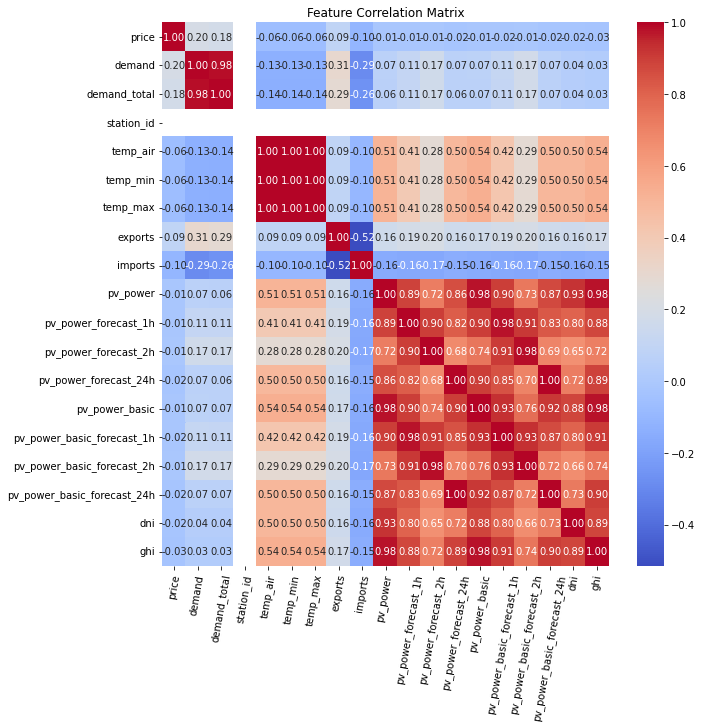

In [36]:
visualise_corr(training_data)

In [ ]:
# remove invalid data that can mislead  


Correlation between numerical columns:
                                price    demand  demand_total  station_id  \
price                        1.000000  0.170838      0.167827         NaN   
demand                       0.170838  1.000000      0.997224         NaN   
demand_total                 0.167827  0.997224      1.000000         NaN   
station_id                        NaN       NaN           NaN         NaN   
temp_air                    -0.056587 -0.225968     -0.231037         NaN   
temp_min                    -0.056587 -0.225968     -0.231037         NaN   
temp_max                    -0.056587 -0.225968     -0.231037         NaN   
exports                      0.106877  0.359355      0.367744         NaN   
imports                     -0.135122 -0.375817     -0.368383         NaN   
pv_power                    -0.013250  0.066355      0.062693         NaN   
pv_power_forecast_1h        -0.014671  0.110406      0.108122         NaN   
pv_power_forecast_2h        -0.00927

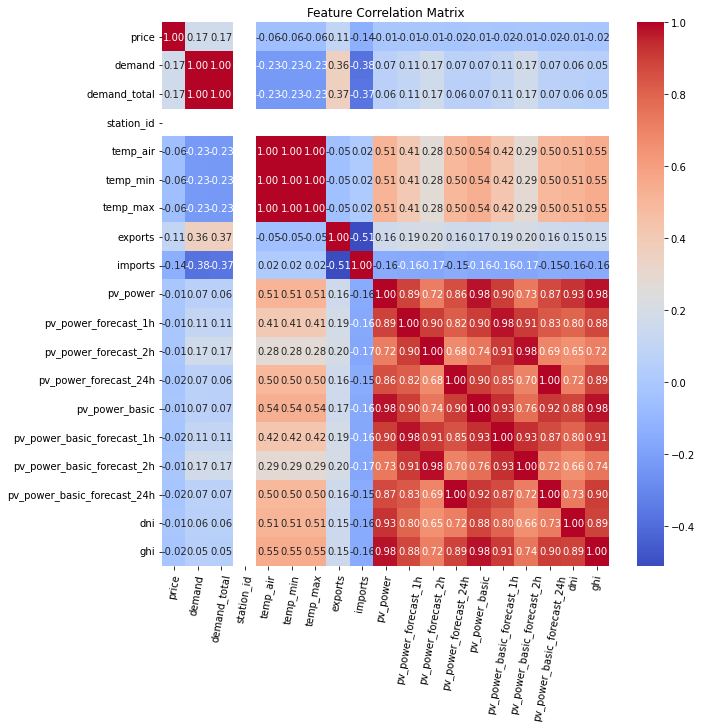

In [59]:
training_data_cleaned = training_data.dropna()

visualise_corr(training_data_cleaned)

In [62]:
training_data_cleaned.head
# temp_air/temp_min/temp_max == same values
# demand >= demand_total
# exports & imports -> put them away?
# pv_power_basic_forecast & pv_power_forecast are similar 
# 1h & 24h forecast: relationship with temp 
# 2h forcest: relationship with demand 

<bound method NDFrame.head of                   timestamp      price   demand  demand_total  station_id  \
227238  2023-03-01 00:30:00   83.50552  1406.71       1427.72       23000   
227239  2023-03-01 00:35:00   81.62862  1390.34       1406.10       23000   
227240  2023-03-01 00:40:00   82.31808  1394.83       1417.70       23000   
227241  2023-03-01 00:45:00   81.89528  1387.33       1396.08       23000   
227242  2023-03-01 00:50:00   79.06075  1388.54       1397.30       23000   
...                     ...        ...      ...           ...         ...   
299468  2023-11-06 19:40:00  104.44000  1595.88       1602.23       23000   
299469  2023-11-06 19:45:00  104.44000  1603.58       1610.18       23000   
299470  2023-11-06 19:50:00  104.44000  1596.40       1603.18       23000   
299471  2023-11-06 19:55:00  104.44000  1585.03       1591.98       23000   
299472  2023-11-06 20:00:00   74.41087  1567.31       1572.25       23000   

        temp_air  temp_min  temp_max    expor

In [63]:
training_data.columns

Index(['timestamp', 'price', 'demand', 'demand_total', 'station_id',
       'temp_air', 'temp_min', 'temp_max', 'exports', 'imports', 'pv_power',
       'pv_power_forecast_1h', 'pv_power_forecast_2h', 'pv_power_forecast_24h',
       'pv_power_basic', 'pv_power_basic_forecast_1h',
       'pv_power_basic_forecast_2h', 'pv_power_basic_forecast_24h', 'dni',
       'ghi', 'timestamp_utc', 'timestamp_local'],
      dtype='object')

In [45]:
training_data.head()

,timestamp,price,demand,demand_total,station_id,temp_air,temp_min,temp_max,exports,imports,pv_power,pv_power_forecast_1h,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic,pv_power_basic_forecast_1h,pv_power_basic_forecast_2h,pv_power_basic_forecast_24h,dni,ghi
0,2021-01-01 00:00:00,32.30093,1234.03,1486.99764,23000,26.3,26.3,26.3,0.0,53.50945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
1,2021-01-01 00:05:00,37.23402,1231.68,1495.32122,23000,26.3,26.3,26.3,0.0,90.34554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
2,2021-01-01 00:10:00,36.67139,1240.71,1503.79835,23000,26.3,26.3,26.3,0.0,82.53181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
3,2021-01-01 00:15:00,36.03389,1224.78,1471.57561,23000,26.3,26.3,26.3,0.0,116.01917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684
4,2021-01-01 00:20:00,34.92372,1211.59,1464.35183,23000,26.3,26.3,26.3,0.0,83.06683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,684


In [51]:

training_data['timestamp_utc'] = pd.to_datetime(training_data['timestamp'])

# Convert datetime from UTC to South Australia local time
training_data['timestamp_local'] = training_data['timestamp_utc'].dt.tz_localize('UTC').dt.tz_convert('Australia/Adelaide')


In [52]:
training_data.head()

,timestamp,price,demand,demand_total,station_id,temp_air,temp_min,temp_max,exports,imports,...,pv_power_forecast_2h,pv_power_forecast_24h,pv_power_basic,pv_power_basic_forecast_1h,pv_power_basic_forecast_2h,pv_power_basic_forecast_24h,dni,ghi,timestamp_utc,timestamp_local
0,2021-01-01 00:00:00,32.30093,1234.03,1486.99764,23000,26.3,26.3,26.3,0.0,53.50945,...,NaN,NaN,NaN,NaN,NaN,NaN,568,684,2021-01-01 00:00:00,2021-01-01 10:30:00+10:30
1,2021-01-01 00:05:00,37.23402,1231.68,1495.32122,23000,26.3,26.3,26.3,0.0,90.34554,...,NaN,NaN,NaN,NaN,NaN,NaN,568,684,2021-01-01 00:05:00,2021-01-01 10:35:00+10:30
2,2021-01-01 00:10:00,36.67139,1240.71,1503.79835,23000,26.3,26.3,26.3,0.0,82.53181,...,NaN,NaN,NaN,NaN,NaN,NaN,568,684,2021-01-01 00:10:00,2021-01-01 10:40:00+10:30
3,2021-01-01 00:15:00,36.03389,1224.78,1471.57561,23000,26.3,26.3,26.3,0.0,116.01917,...,NaN,NaN,NaN,NaN,NaN,NaN,568,684,2021-01-01 00:15:00,2021-01-01 10:45:00+10:30
4,2021-01-01 00:20:00,34.92372,1211.59,1464.35183,23000,26.3,26.3,26.3,0.0,83.06683,...,NaN,NaN,NaN,NaN,NaN,NaN,568,684,2021-01-01 00:20:00,2021-01-01 10:50:00+10:30


In [57]:
training_data['timestamp_local']

0        2021-01-01 10:30:00+10:30
1        2021-01-01 10:35:00+10:30
2        2021-01-01 10:40:00+10:30
3        2021-01-01 10:45:00+10:30
4        2021-01-01 10:50:00+10:30
                    ...           
299468   2023-11-07 06:10:00+10:30
299469   2023-11-07 06:15:00+10:30
299470   2023-11-07 06:20:00+10:30
299471   2023-11-07 06:25:00+10:30
299472   2023-11-07 06:30:00+10:30
Name: timestamp_local, Length: 299473, dtype: datetime64[ns, Australia/Adelaide]

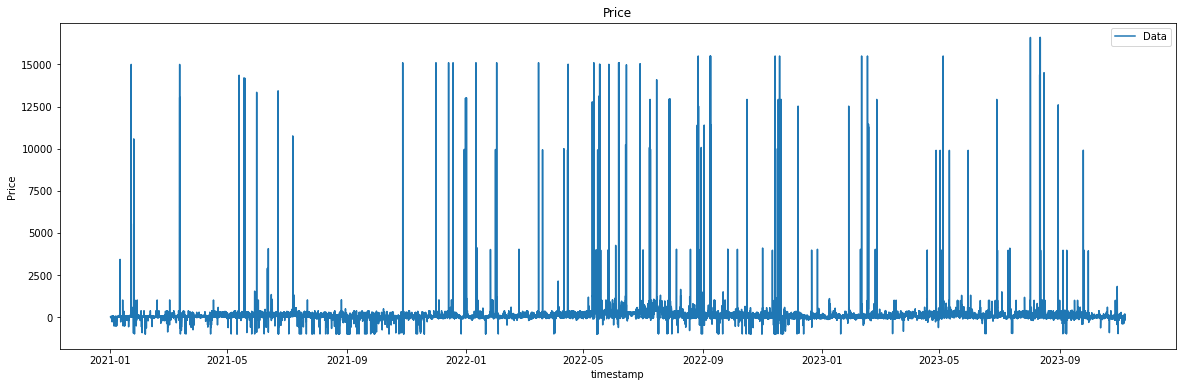

In [58]:
plt.figure(figsize=(20, 6))
plt.plot(training_data['timestamp_local'], training_data['price'], label='Data')
plt.xlabel('timestamp')
plt.ylabel('Price')
plt.legend()
plt.title('Price')
plt.show()

In [ ]:
# extract more features (month, what_day/weekdays(T/F), Hour_of_day)

In [65]:
training_data['month'] = training_data['timestamp_local'].dt.month
training_data['day_name'] = training_data['timestamp_local'].dt.day_name()
training_data['is_weekday'] = training_data['timestamp_local'].dt.weekday < 5  # True for weekdays, False for weekends
training_data['hour_of_day'] = training_data['timestamp_local'].dt.hour


month


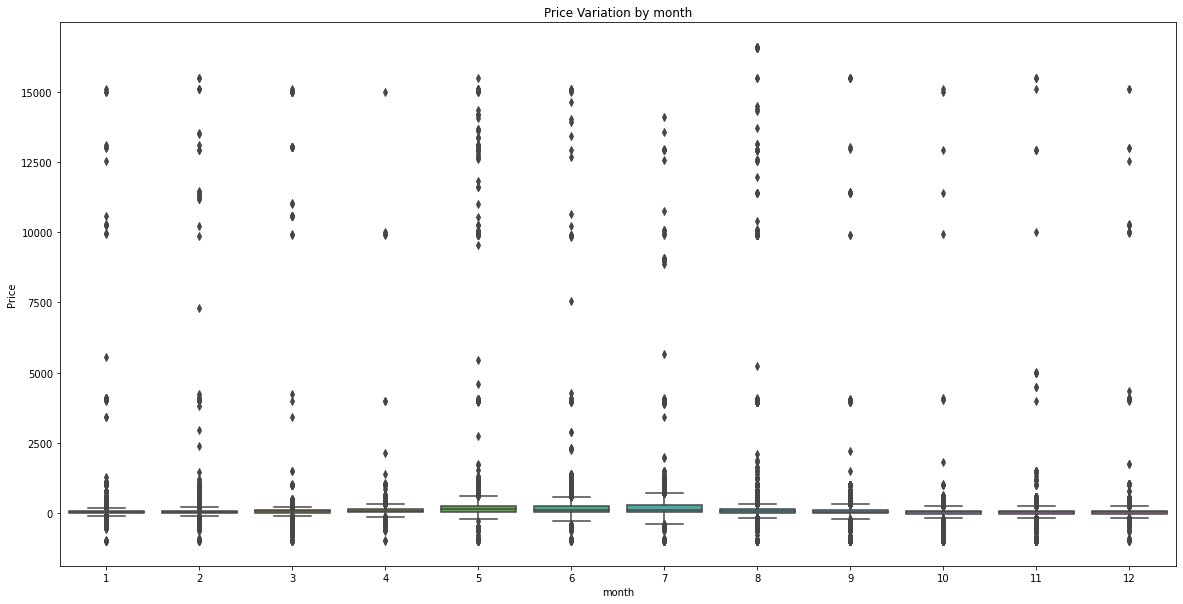

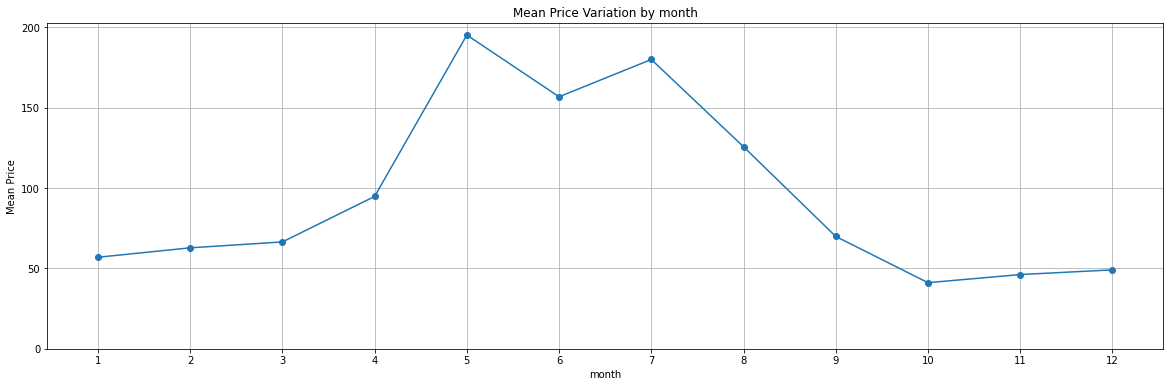

range(1, 13)

day_name


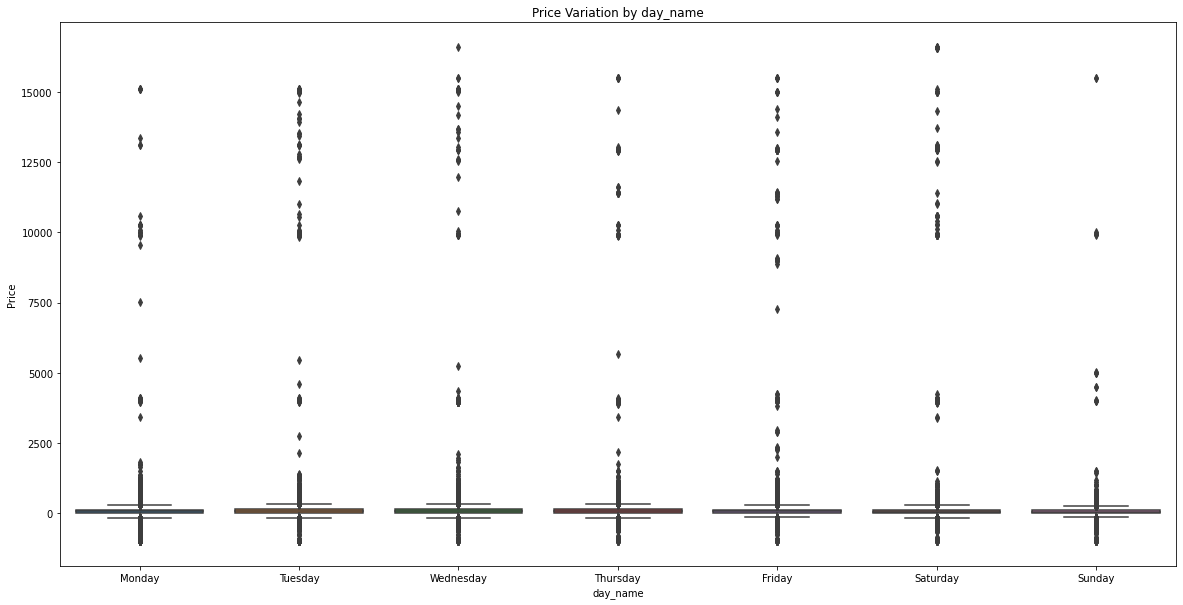

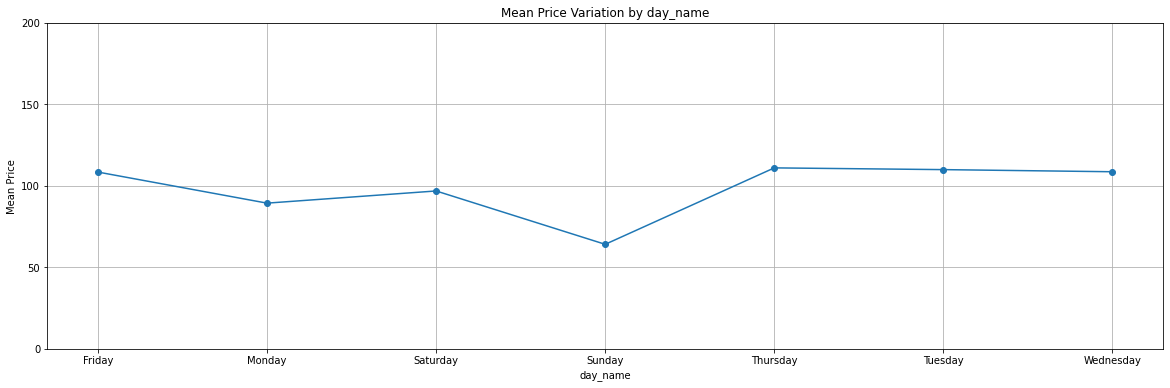

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

is_weekday


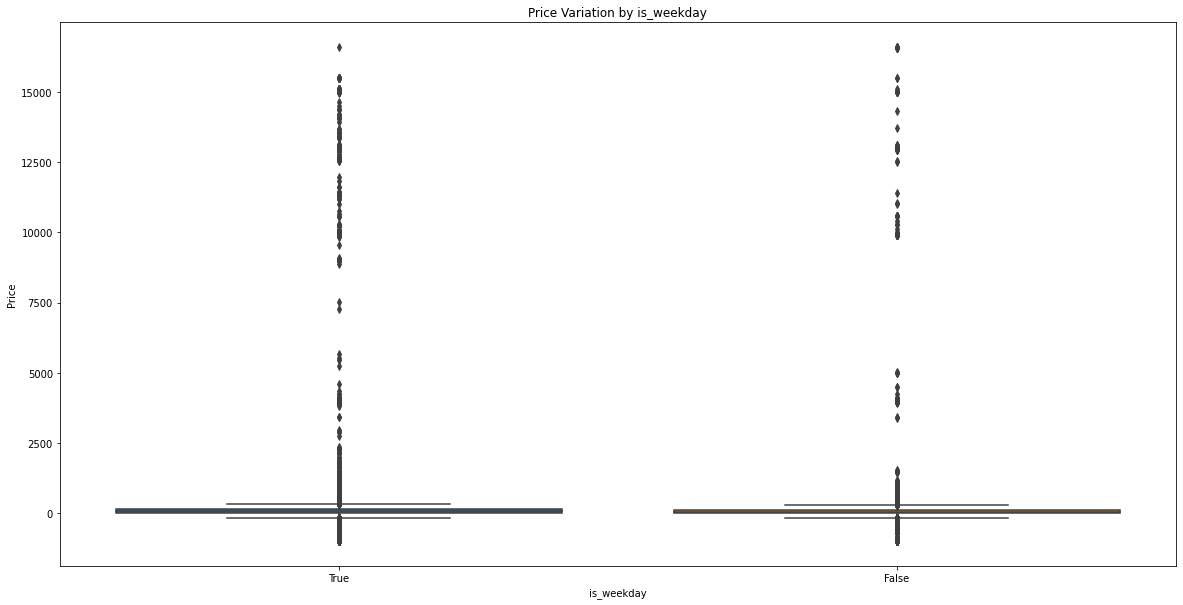

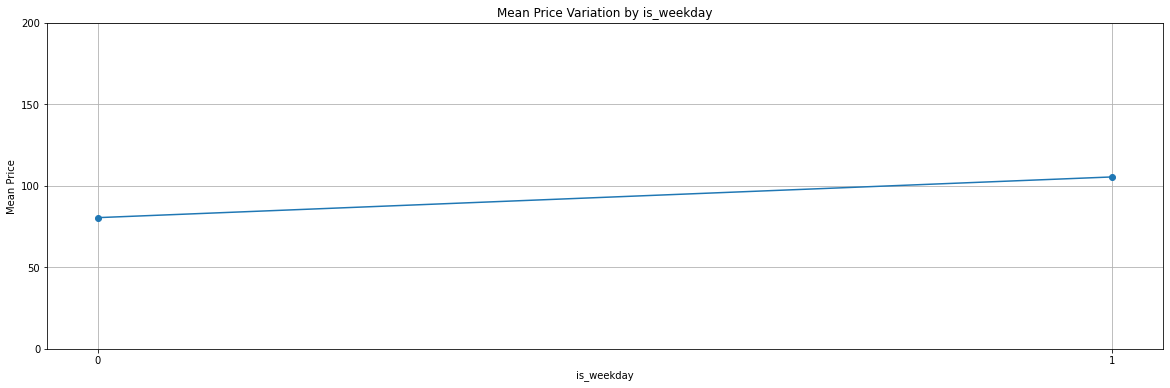

[True, False]

hour_of_day


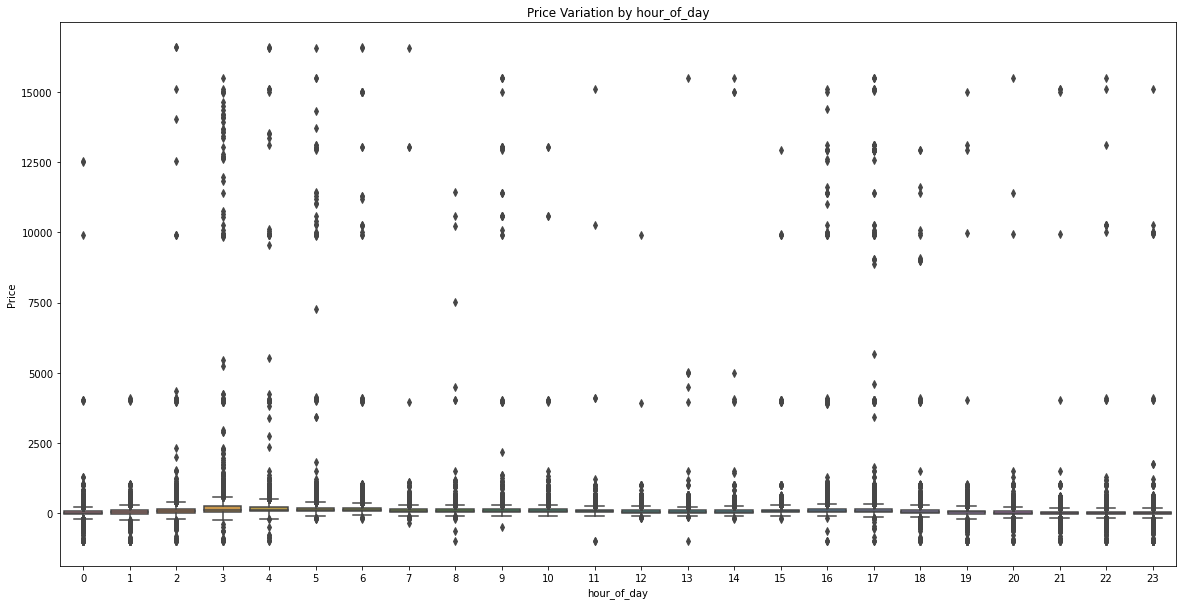

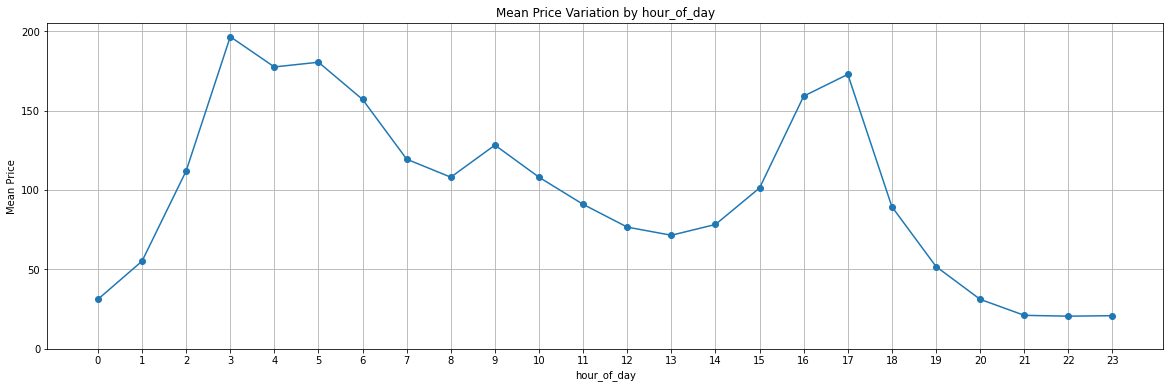

range(0, 24)


In [95]:

for feature in ['month', 'day_name', 'is_weekday', 'hour_of_day']:
    print()
    print(feature)

    if feature == 'month':
        data_order = range(1, 13)
        
    elif feature == 'day_name':
        data_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    elif feature == 'is_weekday':
        data_order = [True, False] 
        
    elif feature == 'hour_of_day':
        data_order = range(0, 24) 
    
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=feature, y='price', data=training_data, order=data_order)
    plt.xlabel(f'{feature}')
    plt.ylabel('Price')
    plt.title(f'Price Variation by {feature}')
    plt.show()

    mean_price = training_data.groupby(feature)['price'].mean().reset_index()

    plt.figure(figsize=(20, 6))
    plt.plot(mean_price[feature], mean_price['price'], marker='o', linestyle='-')
    plt.xlabel(f'{feature}')
    plt.ylabel('Mean Price')
    plt.title(f'Mean Price Variation by {feature}')
    plt.yticks(range(0, 250, 50))  
    plt.xticks(data_order)
    plt.grid(True)
    plt.show()
    print(data_order)

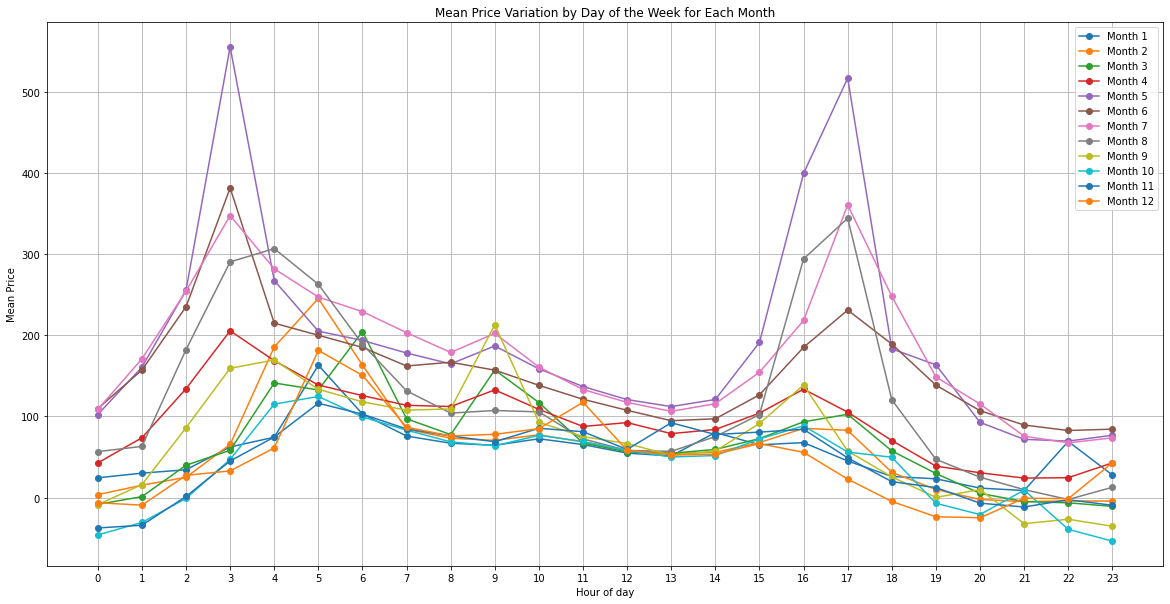

In [101]:

mean_price_month_day = training_data.groupby(['month', 'hour_of_day'])['price'].mean().reset_index()


plt.figure(figsize=(20, 10))

for month in range(1, 13):
    month_data = mean_price_month_day[mean_price_month_day['month'] == month]
    plt.plot(month_data['hour_of_day'], month_data['price'], marker='o', label=f'Month {month}')

plt.xlabel('Hour of day')
plt.ylabel('Mean Price')
plt.title('Mean Price Variation by Day of the Week for Each Month')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [102]:
5mins -> fully charge the battery -> 0.416 KWH

SyntaxError: invalid syntax (<ipython-input-102-e172aacab23e>, line 1)

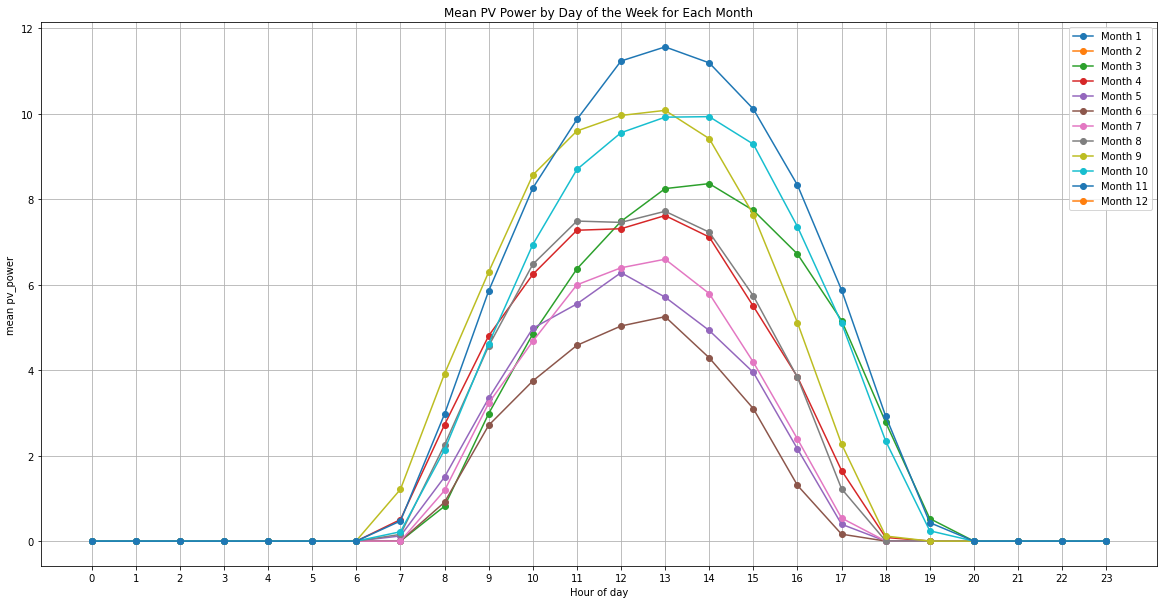

In [103]:
mean_price_month_day = training_data.groupby(['month', 'hour_of_day'])['pv_power'].mean().reset_index()


plt.figure(figsize=(20, 10))

for month in range(1, 13):
    month_data = mean_price_month_day[mean_price_month_day['month'] == month]
    plt.plot(month_data['hour_of_day'], month_data['pv_power'], marker='o', label=f'Month {month}')

plt.xlabel('Hour of day')
plt.ylabel('mean pv_power')
plt.title('Mean PV Power by Day of the Week for Each Month')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
# predict the following price & demand changes (hourly?)
# update charging strategies 
# passive (avoid losing) vs. active (big earning)
# high frequency & low magnitude with negative price 
# low frequency & very high magnitude with positive price